# fastai MNIST exercise

In [3]:
#setup
!pip install -qq fastbook

In [4]:
import fastbook
fastbook.setup_book()

In [5]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap = 'Grays')

In [6]:
#path to handwritten digit images
path = untar_data(URLs.MNIST_SAMPLE)
print(path)

/home/ec2-user/.fastai/data/mnist_sample


In [8]:
Path.BASE_PATH = path


In [9]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [10]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [12]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [13]:
#draw one example
im3_path = threes[0]
im3 = Image.open(im3_path)
im3

In [17]:
#computer sees image as  an array of gray values
array(im3)[10:15,10:15]

array([[  0,   0,   0,  24, 209],
       [  0,   0,  91, 137, 253],
       [ 40, 214, 250, 254, 254],
       [ 81, 247, 254, 254, 254],
       [  0, 110, 246, 254, 254]], dtype=uint8)

In [18]:
#or in tensor
tensor(im3)[10:15,10:15]

tensor([[  0,   0,   0,  24, 209],
        [  0,   0,  91, 137, 253],
        [ 40, 214, 250, 254, 254],
        [ 81, 247, 254, 254, 254],
        [  0, 110, 246, 254, 254]], dtype=torch.uint8)

In [29]:
#use pandas to color code gray values
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[3:20,8:20])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,42,118,219,166,118,118,6,0,0
2,0,0,103,242,254,254,254,254,254,66,0,0
3,0,0,18,232,254,254,254,254,254,238,70,0
4,0,0,0,104,244,254,224,254,254,254,141,0
5,0,0,0,0,207,254,210,254,254,254,34,0
6,0,0,0,0,84,206,254,254,254,254,41,0
7,0,0,0,0,0,24,209,254,254,254,171,0
8,0,0,0,0,91,137,253,254,254,254,112,0
9,0,0,40,214,250,254,254,254,254,254,34,0


In [31]:
#load all images into tensors
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

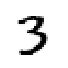

In [58]:
cmap = {'cmap':'Greys'}
show_image(three_tensors[1], **cmap) #added kwargs to address the error, when default 'cmap':'Grays'

In [66]:
#stack the images and cast the values as float (0,1)
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [38]:
len(stacked_threes.shape), stacked_threes.ndim

(3, 3)

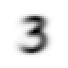

In [68]:
#stack by mean
mean3 = stacked_threes.mean(0) #argument 0 to set which dimension to stack
show_image(mean3, **cmap)

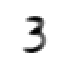

In [57]:
#stack by median
med3 = stacked_threes.quantile(q = 0.5, dim = 0)
show_image(med3, **cmap)

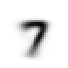

In [59]:
#for sevens
mean7 = stacked_sevens.mean(0)
show_image(mean7, **cmap)

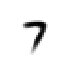

In [60]:
med7 = stacked_sevens.quantile(0.5, 0)
show_image(med7, **cmap)

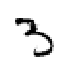

In [71]:
#use a single image of a three as example
a_3 = stacked_threes[random.randint(0,len(three_tensors))]
show_image(a_3, **cmap)

In [77]:
#l1 and mse loss against ideal 3
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_rmse = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_rmse

(tensor(0.1687), tensor(0.2982))

In [76]:
#l1 and mse loss against ideal 7
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_rmse = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_rmse

(tensor(0.1678), tensor(0.3128))

PyTorch already provides both of these as loss functions. You'll find these inside torch.nn.functional, which the PyTorch team recommends importing as F (and is available by default under that name in fastai):

In [75]:
F.l1_loss(a_3, mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1678), tensor(0.3128))